In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#https://colab.research.google.com/drive/1O3c88M3QmoqSL_4yBZ_HOa_hjVs_af0R#scrollTo=no4y1cBE-WI_              homework last year

#LIBRERIES and FUNCTIONS

In [ ]:
!pip install -U scikit-learn

In [62]:
import re

import pandas as pd
import numpy as np

import random

import seaborn as sns

from sklearn import datasets, linear_model, tree, svm
from sklearn.preprocessing import normalize, minmax_scale, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# check version number
import imblearn

# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot

from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/ML/Homework_1_ML_22_23/train_set.tsv'

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
def normalization_data(uavs, normalization):

  if normalization == "min_max":

    data_norm = uavs.to_numpy() #fa side effect su uavs
    max = np.max(data_norm)
    min = np.min(data_norm)
    for i in range(1000):
      for j in range(35):
        data_norm[i][j] = np.divide((data_norm[i][j]-min),(max-min))

  elif normalization == "normalize":
    data_norm = normalize(uavs, norm='l2', axis=1, copy=True, return_norm=False)

  elif normalization == "scaler":
    scaler = StandardScaler()
    scaler.fit(uavs)
    data_norm = scaler.transform(uavs)

  else :
    data_norm = minmax_scale(uavs, feature_range=(0,1))

  print(data_norm)
  print(np.max(data_norm), np.min(data_norm))

  return data_norm

In [65]:
def evalution_mats(normalization, model_type, X_test, y_test):
  print("Normalizazion type: %s \n Model type: %s\n "%(normalization, model_type))

  y_pred = model.predict(X_test)      #se uso gauss aggiungere .toArray() a X_test

  print("############## CONFUSION MATRIX ONE TO ONE ##############")
  cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4], sample_weight=None) 
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
  disp.plot()
  plt.show()

  mcm = multilabel_confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4]) 
  i = 0
  for elem in mcm:
    print("############## CONFUSION MATRIX ONE (%d) TO REST ##############"%i)
    disp = ConfusionMatrixDisplay(confusion_matrix=elem)
    disp.plot()
    plt.show()
    i += 1

  print(classification_report(y_test, y_pred))

#LOAD of DATASET

In [66]:
db_map = pd.read_csv(filename, sep='\t', header = 0)

In [67]:
################################### DATA ###################################
uavs = db_map.iloc[:,:-2]
print(uavs)

num_coll = db_map.num_collisions
min_cpa = db_map.min_CPA

print(num_coll)
print(min_cpa)

     UAV_1_track       UAV_1_x       UAV_1_y    UAV_1_vx    UAV_1_vy  \
0       0.027068 -62300.591721 -59305.682068    6.705684  247.671970   
1       4.023101 -17220.612570  47439.586909 -167.653031 -138.169553   
2       1.841994 -19900.350438  59030.833595  208.716697  -58.033328   
3       3.621532 -48565.126583 -11986.418570 -113.516305 -218.076997   
4       2.318417  52665.281329 -47498.516869  177.796999 -164.846698   
..           ...           ...           ...         ...         ...   
995     1.069408 -70156.389933  10977.295766  213.943568  117.263798   
996     2.970409 -35222.365570  75522.014012   40.286500 -233.037428   
997     0.819170 -20700.613915  36868.509417  178.147393  166.503507   
998     4.394689  48588.669327 -32320.905331 -202.414834  -66.561909   
999     1.464690 -20386.325378 -69553.280565  247.685574   26.380062   

     UAV_1_target_x  UAV_1_target_y  UAV_2_track       UAV_2_x       UAV_2_y  \
0     -59569.480482    41566.912694     1.474570 -56681

In [68]:
################################### ANALISI LABEL ###################################
c = Counter(num_coll)
print(c)

Counter({0: 538, 1: 333, 2: 96, 3: 30, 4: 3})


## CLASSIFICATION WITHOUT OVERSAMPLE

In [10]:
################################### NORMALIZATION ###################################
normalization = "scaler"
data_norm = normalization_data(uavs, normalization)        #choose between : normalize, min_max, scaler, min_max_scale

[[-1.71644921 -1.62265282 -1.60543353 ... -0.03568814  0.78281754
   0.66885985]
 [ 0.51772008 -0.40449671  1.19281222 ... -0.50775245 -0.06392251
  -0.95117126]
 [-0.70172975 -0.47690887  1.49666791 ...  0.94756599  1.50468633
   0.12807485]
 ...
 [-1.27358767 -0.49853368  0.9156995  ... -1.20117817 -0.73209425
  -1.47525152]
 [ 0.72547363  1.37380889 -0.8980482  ... -0.69234498 -0.76921153
   0.01089348]
 [-0.91267937 -0.49004094 -1.8740665  ...  1.53915466 -1.00709184
   1.21315026]]
2.4381161356997394 -2.4246677306743694


In [11]:
################################### SPLIT OF DATASET ###################################7

X_map = data_norm
y_map = num_coll

print("X_map all shape", X_map.shape)
print("y_map all shape", y_map.shape)

X_train, X_test, y_train, y_test = train_test_split(X_map, y_map, test_size=0.25, random_state=16)

print("Train: %d - Test: %d" %(X_train.shape[0], X_test.shape[0]))


X_map all shape (1000, 35)
y_map all shape (1000,)
Train: 750 - Test: 250


In [13]:
################################### CREATE AND FIT MDOEL ###################################

model_type = "ran_for" 

if model_type == "bernoulli":
  model = BernoulliNB().fit(X_train, y_train)
  print('Bernoulli Model created')
elif model_type == "tree":
  model = tree.DecisionTreeClassifier(criterion = "log_loss", splitter = "best", class_weight='balanced').fit(X_train, y_train)
  print('Tree Model created')
elif model_type == "ran_for":
  model = RandomForestClassifier(n_estimators = 200, random_state = 0).fit(X_train, y_train)
  print('Random Forest Model created')
elif model_type == "neig":
  model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

Random Forest Model created


Normalizazion type: scaler 
 Model type: ran_for
 
############## CONFUSION MATRIX ONE TO ONE ##############


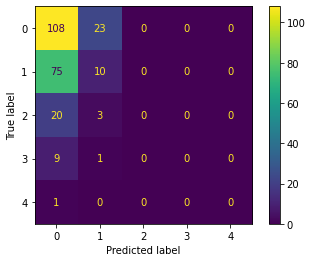

############## CONFUSION MATRIX ONE (0) TO REST ##############


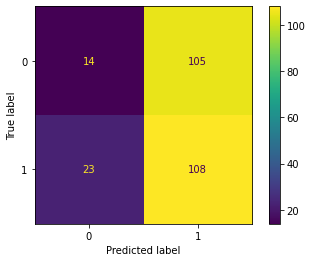

############## CONFUSION MATRIX ONE (1) TO REST ##############


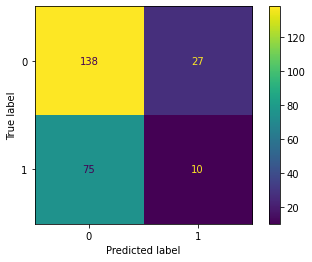

############## CONFUSION MATRIX ONE (2) TO REST ##############


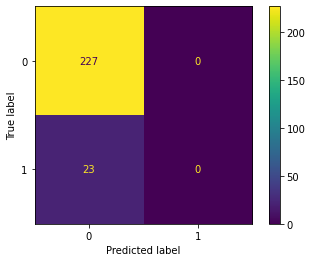

############## CONFUSION MATRIX ONE (3) TO REST ##############


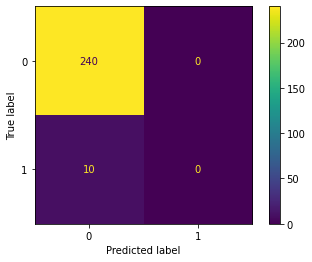

############## CONFUSION MATRIX ONE (4) TO REST ##############


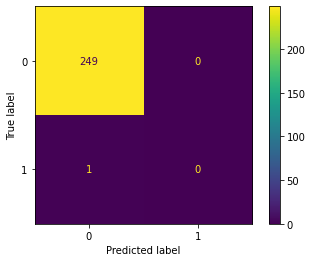

              precision    recall  f1-score   support

           0       0.51      0.82      0.63       131
           1       0.27      0.12      0.16        85
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.47       250
   macro avg       0.16      0.19      0.16       250
weighted avg       0.36      0.47      0.38       250



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
################################### EVALUATION ###################################
evalution_mats(normalization, model_type, X_test, y_test)

## CLASSIFICATION WITH OVERSAMPLE

In [69]:
y = LabelEncoder().fit_transform(num_coll)
counter = Counter(y)
print("Class distribution BEFORE oversample")
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(uavs, num_coll)
print("\nClass distribution AFTER oversample")
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class distribution BEFORE oversample
Class=3, n=30 (3.000%)
Class=0, n=538 (53.800%)
Class=1, n=333 (33.300%)
Class=2, n=96 (9.600%)
Class=4, n=3 (0.300%)

Class distribution AFTER oversample
Class=3, n=538 (20.000%)
Class=0, n=538 (20.000%)
Class=1, n=538 (20.000%)
Class=2, n=538 (20.000%)
Class=4, n=538 (20.000%)


In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(uavs, num_coll)

In [70]:
################################### NORMALIZATION ###################################
normalization = "scaler"
data_norm = normalization_data(X, normalization)        #scegliere tra : normalize, min_max, scaler, min_max_scale

[[-1.88067554 -1.5728628  -1.71443745 ... -0.10118542  0.89468822
   0.85320582]
 [ 0.56385268 -0.2277668   1.32404144 ... -0.64462203 -0.01132836
  -1.09251001]
 [-0.77041485 -0.30772479  1.65398354 ...  1.03072879  1.66709184
   0.20370352]
 ...
 [ 0.23643951 -0.70278967  0.4442966  ...  0.63078287 -1.12249477
   0.09907992]
 [-0.53914149 -1.0424005   1.06343801 ...  0.54443945 -0.40598711
  -0.12435433]
 [-0.50484013 -1.06462022  1.10838622 ...  0.62227801 -0.57790083
  -0.07690526]]
2.8421645508381856 -2.7087191029886304


In [71]:
################################### SPLIT OF DATASET ###################################7

X_map = data_norm
y_map = y

print("X_map all shape", X_map.shape)
print("y_map all shape", y_map.shape)

X_train, X_test, y_train, y_test = train_test_split(X_map, y_map, test_size=0.25, random_state=16)

print("Train: %d - Test: %d" %(X_train.shape[0], X_test.shape[0]))


X_map all shape (2690, 35)
y_map all shape (2690,)
Train: 2017 - Test: 673


In [72]:
################################### CREATE AND FIT MDOEL ###################################

model_type = "ran_for" 

if model_type == "bernoulli":
  model = BernoulliNB().fit(X_train, y_train)
  print('Bernoulli Model created')
elif model_type == "tree":
  model = tree.DecisionTreeClassifier(criterion = "log_loss", splitter = "best").fit(X_train, y_train)
  print('Tree Model created')
elif model_type == "ran_for":
  model = RandomForestClassifier(n_estimators = 1000, random_state = 0).fit(X_train, y_train)
  print('Random Forest Model created')
elif model_type == "neig":
  model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

Tree Model created


Normalizazion type: scaler 
 Model type: tree
 
############## CONFUSION MATRIX ONE TO ONE ##############


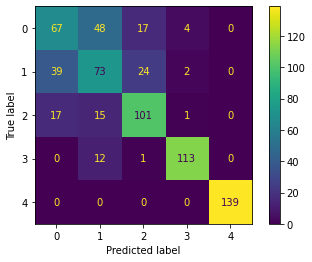

############## CONFUSION MATRIX ONE (0) TO REST ##############


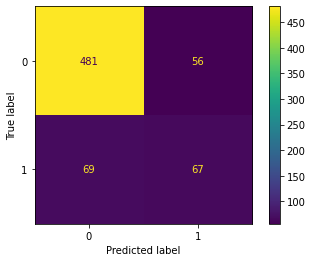

############## CONFUSION MATRIX ONE (1) TO REST ##############


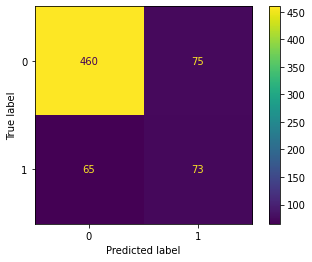

############## CONFUSION MATRIX ONE (2) TO REST ##############


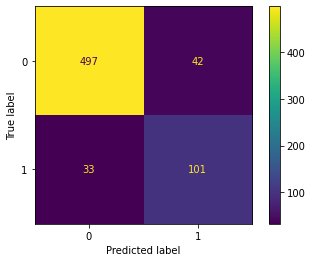

############## CONFUSION MATRIX ONE (3) TO REST ##############


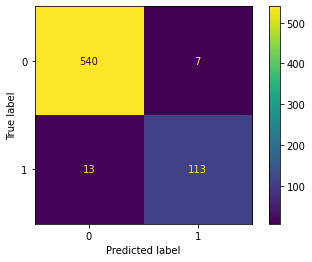

############## CONFUSION MATRIX ONE (4) TO REST ##############


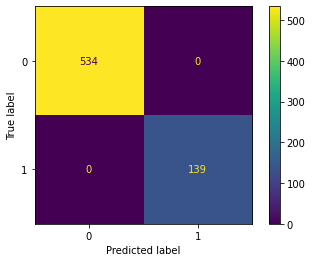

              precision    recall  f1-score   support

           0       0.54      0.49      0.52       136
           1       0.49      0.53      0.51       138
           2       0.71      0.75      0.73       134
           3       0.94      0.90      0.92       126
           4       1.00      1.00      1.00       139

    accuracy                           0.73       673
   macro avg       0.74      0.73      0.74       673
weighted avg       0.73      0.73      0.73       673



In [73]:
################################### EVALUATION ###################################
evalution_mats(normalization, model_type, X_test, y_test)

In [ ]:
#K-Fold Cross Validation 
cv = ShuffleSplit(n_splits=15, test_size=0.333, random_state=15)
scores = cross_val_score(model, X_map, y_map, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#model.score(X_test, y_test)

[0.86941964 0.87388393 0.88504464 0.85491071 0.86607143 0.875
 0.88727679 0.87388393 0.87276786 0.87611607 0.87053571 0.87388393
 0.87276786 0.90066964 0.88839286]
Accuracy: 0.876 (+/- 0.02)


# Regression Task

In [7]:
db_map = pd.read_csv(filename, sep='\t', header = 0)
print(type(db_map))

<class 'pandas.core.frame.DataFrame'>


In [44]:
#fare prova, accedere come dicono le slide

uavs = db_map.iloc[:,:]

for col in db_map.columns:
  if 'num_collisions' in col:
    del db_map[col]

print(uavs)

     UAV_1_track       UAV_1_x       UAV_1_y    UAV_1_vx    UAV_1_vy  \
0       0.027068 -62300.591721 -59305.682068    6.705684  247.671970   
1       4.023101 -17220.612570  47439.586909 -167.653031 -138.169553   
2       1.841994 -19900.350438  59030.833595  208.716697  -58.033328   
3       3.621532 -48565.126583 -11986.418570 -113.516305 -218.076997   
4       2.318417  52665.281329 -47498.516869  177.796999 -164.846698   
..           ...           ...           ...         ...         ...   
995     1.069408 -70156.389933  10977.295766  213.943568  117.263798   
996     2.970409 -35222.365570  75522.014012   40.286500 -233.037428   
997     0.819170 -20700.613915  36868.509417  178.147393  166.503507   
998     4.394689  48588.669327 -32320.905331 -202.414834  -66.561909   
999     1.464690 -20386.325378 -69553.280565  247.685574   26.380062   

     UAV_1_target_x  UAV_1_target_y  UAV_2_track       UAV_2_x       UAV_2_y  \
0     -59569.480482    41566.912694     1.474570 -56681

In [53]:
print((uavs.shape))
data_norm = normalization_data(uavs, "scaler") 

(1000, 36)
[[-1.71644921 -1.62265282 -1.60543353 ...  0.78281754  0.66885985
  -1.0816907 ]
 [ 0.51772008 -0.40449671  1.19281222 ... -0.06392251 -0.95117126
   3.40570534]
 [-0.70172975 -0.47690887  1.49666791 ...  1.50468633  0.12807485
   0.45716524]
 ...
 [-1.27358767 -0.49853368  0.9156995  ... -0.73209425 -1.47525152
  -0.83571451]
 [ 0.72547363  1.37380889 -0.8980482  ... -0.76921153  0.01089348
  -1.08983912]
 [-0.91267937 -0.49004094 -1.8740665  ... -1.00709184  1.21315026
  -0.67948238]]
4.0096109933557065 -2.4246677306743694


In [54]:
print(data_norm.shape)

(1000, 36)


In [55]:
X = [] #data but last column(min_CPA) of data_norm
y = [] #last column(min_CPA) of data_norm


n_rows = data_norm.shape[0]
n_cols = data_norm.shape[1]


for i in range(n_rows):
  y.append(data_norm[i][-1])
  X.append(data_norm[i][:-1])


print(len(X))
print(len(X[0]))
print("----------------------------------------------------")
print(len(y))

1000
35
----------------------------------------------------
1000


In [56]:
model = LinearRegression()
arr_x = np.array(X)
arr_y = np.array(y)

model.fit(arr_x, arr_y)

LinearRegression()

In [57]:
r_sq = model.score(arr_x, arr_y)
#print(X)
'''for elem in X:
  print(elem)
  print(len(elem))'''
#print(y)
print("coefficient of determination: %f"%r_sq)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")



y_pred = model.predict(X)
#print(f"predicted response:\n{y_pred}")

errors = mean_squared_error(arr_y, y_pred)
print("MSE", errors)
errors = mean_squared_error(arr_y, y_pred, squared=False)
print("RMSE", errors)
errors = mean_absolute_error(arr_y, y_pred)
print("MAE", errors)

coefficient of determination: 0.039889
intercept: -4.153473004894509e-17
slope: [-0.05136293  0.0463816   0.01712845 -0.08348408  0.01561483 -0.03858463
  0.03444627 -0.01524692  0.09582771 -0.00156839  0.09049437 -0.10544194
 -0.10025413  0.04759789  0.10600815 -0.08637347  0.00990499 -0.04462734
 -0.0242237   0.11210935 -0.00887856 -0.01448322 -0.04162017  0.03462693
 -0.01405391 -0.00652111 -0.04963918 -0.03765215 -0.06028161 -0.01885123
  0.00398805 -0.01696564  0.02391659 -0.04050371 -0.01301264]
MSE 0.960110778356408
RMSE 0.9798524268257991
MAE 0.7713133897021257


In [58]:
#transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(arr_x)
model = LinearRegression().fit(x_, arr_y)

In [59]:
r_sq = model.score(x_, arr_y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
#print(f"coefficients: {model.coef_}")

y_pred = model.predict(x_)

errors = mean_squared_error(arr_y, y_pred)
print("MSE", errors)
errors = mean_squared_error(arr_y, y_pred, squared=False)
print("RMSE", errors)
errors = mean_absolute_error(arr_y, y_pred)
print("MAE", errors)

coefficient of determination: 0.7820090298454634
intercept: -808445939.6871395
MSE 0.2179909701545365
RMSE 0.4668950311949534
MAE 0.3698381443694556
